In [35]:
import time

In [36]:
inplementations_time = []

### 2D Array

In [37]:
# Python program for Dijkstra's single 
# source shortest path algorithm. The program is 
# for adjacency matrix representation of the graph 

# Library for INT_MAX 
import sys 

class Graph(): 

    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [[0 for column in range(vertices)] 
                    for row in range(vertices)] 

    def printSolution(self, dist): 
        print( "Vertex \tDistance from Source")
        for node in range(self.V): 
            print(node, "\t", dist[node]) 

    # A utility function to find the vertex with 
    # minimum distance value, from the set of vertices 
    # not yet included in shortest path tree 
    def minDistance(self, dist, sptSet): 

        # Initilaize minimum distance for next node 
        min = sys.maxsize

        # Search not nearest vertex not in the 
        # shortest path tree 
        for v in range(self.V): 
            if dist[v] < min and sptSet[v] == False: 
                min = dist[v] 
                min_index = v 

        return min_index 

    # Funtion that implements Dijkstra's single source 
    # shortest path algorithm for a graph represented 
    # using adjacency matrix representation 
    def dijkstra(self, src): 

        dist = [sys.maxsize] * self.V 
        dist[src] = 0
        sptSet = [False] * self.V 

        for cout in range(self.V): 

            # Pick the minimum distance vertex from 
            # the set of vertices not yet processed. 
            # u is always equal to src in first iteration 
            u = self.minDistance(dist, sptSet) 

            # Put the minimum distance vertex in the 
            # shotest path tree 
            sptSet[u] = True

            # Update dist value of the adjacent vertices 
            # of the picked vertex only if the current 
            # distance is greater than new distance and 
            # the vertex in not in the shotest path tree 
            for v in range(self.V): 
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]: 
                        dist[v] = dist[u] + self.graph[u][v] 

        self.printSolution(dist) 



# This code is contributed by Divyanshu Mehta 
#source:https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/

In [38]:
# Driver program 
arrayTimeStart = time.process_time()
g = Graph(10) 
g.graph = [
        [0, 4, 0, 0, 0, 0, 0, 8, 0, 7], 
        [4, 0, 8, 0, 0, 0, 0, 11, 0, 0], 
        [0, 8, 0, 7, 0, 4, 0, 0, 2, 0], 
        [0, 0, 7, 0, 9, 14, 0, 0, 0, 0], 
        [0, 0, 0, 9, 0, 10, 0, 0, 0, 0], 
        [0, 0, 4, 14, 10, 0, 2, 0, 0, 0], 
        [0, 0, 0, 0, 0, 2, 0, 1, 6, 0], 
        [8, 11, 0, 0, 0, 0, 1, 0, 7, 0], 
        [0, 0, 2, 0, 0, 0, 6, 7, 0, 4],
        [7, 0, 0, 0, 0, 0, 0, 0, 4, 0] 
        ]; 
g.dijkstra(0); 
arrayTimeEnd = time.process_time()
arrayDuration = arrayTimeEnd - arrayTimeStart
inplementations_time.append(arrayDuration)

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 19
4 	 21
5 	 11
6 	 9
7 	 8
8 	 11
9 	 7


### List

In [39]:
# returns a list with elements in order of the path
# between the start and end of a graph
# @param parent dict the mapping between node and parent
# @param start int the starting node
# @param end int the ending node
def backtrace(parent, start, end):
    path = [end]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()
    return path

# Uses dijkstra's algorithm to find the shortest path
# @param graph list of lists, adjacency list
# @param source int the source node to start the search
# @param target int the target node to search for
def dijkstra(graph, source, target):
    queue = []
    visited = {}
    distance = {}
    shortest_distance = {}
    parent = {}
    
    for node in range(len(graph)):
        distance[node] = None
        visited[node] = False
        parent[node] = None
        shortest_distance[node] = float("inf")
    
    queue.append(source)
    distance[source] = 0
    while len(queue) != 0:
        current = queue.pop(0)
        visited[current] = True
        if current == target:
            print (backtrace(parent, source, target))
            #break
        for neighbor in graph[current]:
            if visited[neighbor] == False:
                distance[neighbor] = distance[current] + 1
                if distance[neighbor] < shortest_distance[neighbor]:
                    shortest_distance[neighbor] = distance[neighbor]
                    parent[neighbor] = current
                    queue.append(neighbor)
    print (distance)
    print (shortest_distance)
    print (parent)
    print (target)

#source:(http://pythonfiddle.com/dijkstra/)

In [40]:
listTimeStart = time.process_time()
adjList = [ 
  [1, 6, 8],
  [0, 4, 6, 9],
  [4, 6],
  [4, 5, 8],
  [1, 2, 3, 5, 9],
  [3, 4],
  [0, 1, 2],
  [8, 9],
  [0, 3, 7],
  [1, 4, 7] ]
dijkstra(adjList, 0, 3)
listTimeEnd = time.process_time()
listDuration = listTimeEnd - listTimeStart
inplementations_time.append(listDuration)

[0, 8, 3]
{0: 0, 1: 1, 2: 3, 3: 3, 4: 2, 5: 4, 6: 2, 7: 4, 8: 1, 9: 3}
{0: inf, 1: 1, 2: 3, 3: 2, 4: 2, 5: 3, 6: 1, 7: 2, 8: 1, 9: 2}
{0: None, 1: 0, 2: 6, 3: 8, 4: 1, 5: 4, 6: 0, 7: 8, 8: 0, 9: 1}
3


### Priority queue heap

In [41]:
import heapq


class HeapEntry:
    def __init__(self, node, priority):
        self.node = node
        self.priority = priority

    def __lt__(self, other):
        return self.priority < other.priority


class Graph:
    def __init__(self):
        self.nodes = {}

    def add_node(self, key, neighbours):
        self.nodes[key] = neighbours

    def traceback_path(self, target, parents):
        path = []
        while target:
            path.append(target)
            target = parents[target]
        return list(reversed(path))

    def shortest_path(self, start, finish):
        OPEN = [HeapEntry(start, 0.0)]
        CLOSED = set()
        parents = {start: None}
        distance = {start: 0.0}

        while OPEN:
            current = heapq.heappop(OPEN).node

            if current is finish:
                return self.traceback_path(finish, parents)

            if current in CLOSED:
                continue

            CLOSED.add(current)

            for child in self.nodes[current].keys():
                if child in CLOSED:
                    continue
                tentative_cost = distance[current] + self.nodes[current][child]

                if child not in distance.keys() or distance[child] > tentative_cost:
                    distance[child] = tentative_cost
                    parents[child] = current
                    heap_entry = HeapEntry(child, tentative_cost)
                    heapq.heappush(OPEN, heap_entry)

#source:https://codereview.stackexchange.com/questions/142734/dijkstras-algorithm-using-a-dictionary-for-the-priority-queue

In [42]:
priorityTimeStart = time.process_time()
g = Graph()
g.add_node('A', {'B': 5, 'C': 1})
g.add_node('B', {'D': 2, 'A': 5})
g.add_node('C', {'D': 9, 'A': 1})
g.add_node('D', {'B': 2, 'E': 9, 'F': 3})
g.add_node('E', {'D': 9, 'F': 2})
g.add_node('F', {'D': 3, 'E': 2, 'G': 5, 'H': 6})
g.add_node('G', {'F': 5, 'H': 1, 'I': 7})
g.add_node('H', {'F': 6, 'G': 1})
g.add_node('I', {'G': 7, 'J': 4})
g.add_node('J', {'I': 4})
g.shortest_path("A", 'J')
priorityTimeEnd = time.process_time()
priorityDuration = priorityTimeEnd - priorityTimeStart
inplementations_time.append(priorityDuration)

In [43]:
import smallworld
%matplotlib inline
from smallworld.draw import draw_network
from smallworld import get_smallworld_graph


### Binomial heap

In [44]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import random

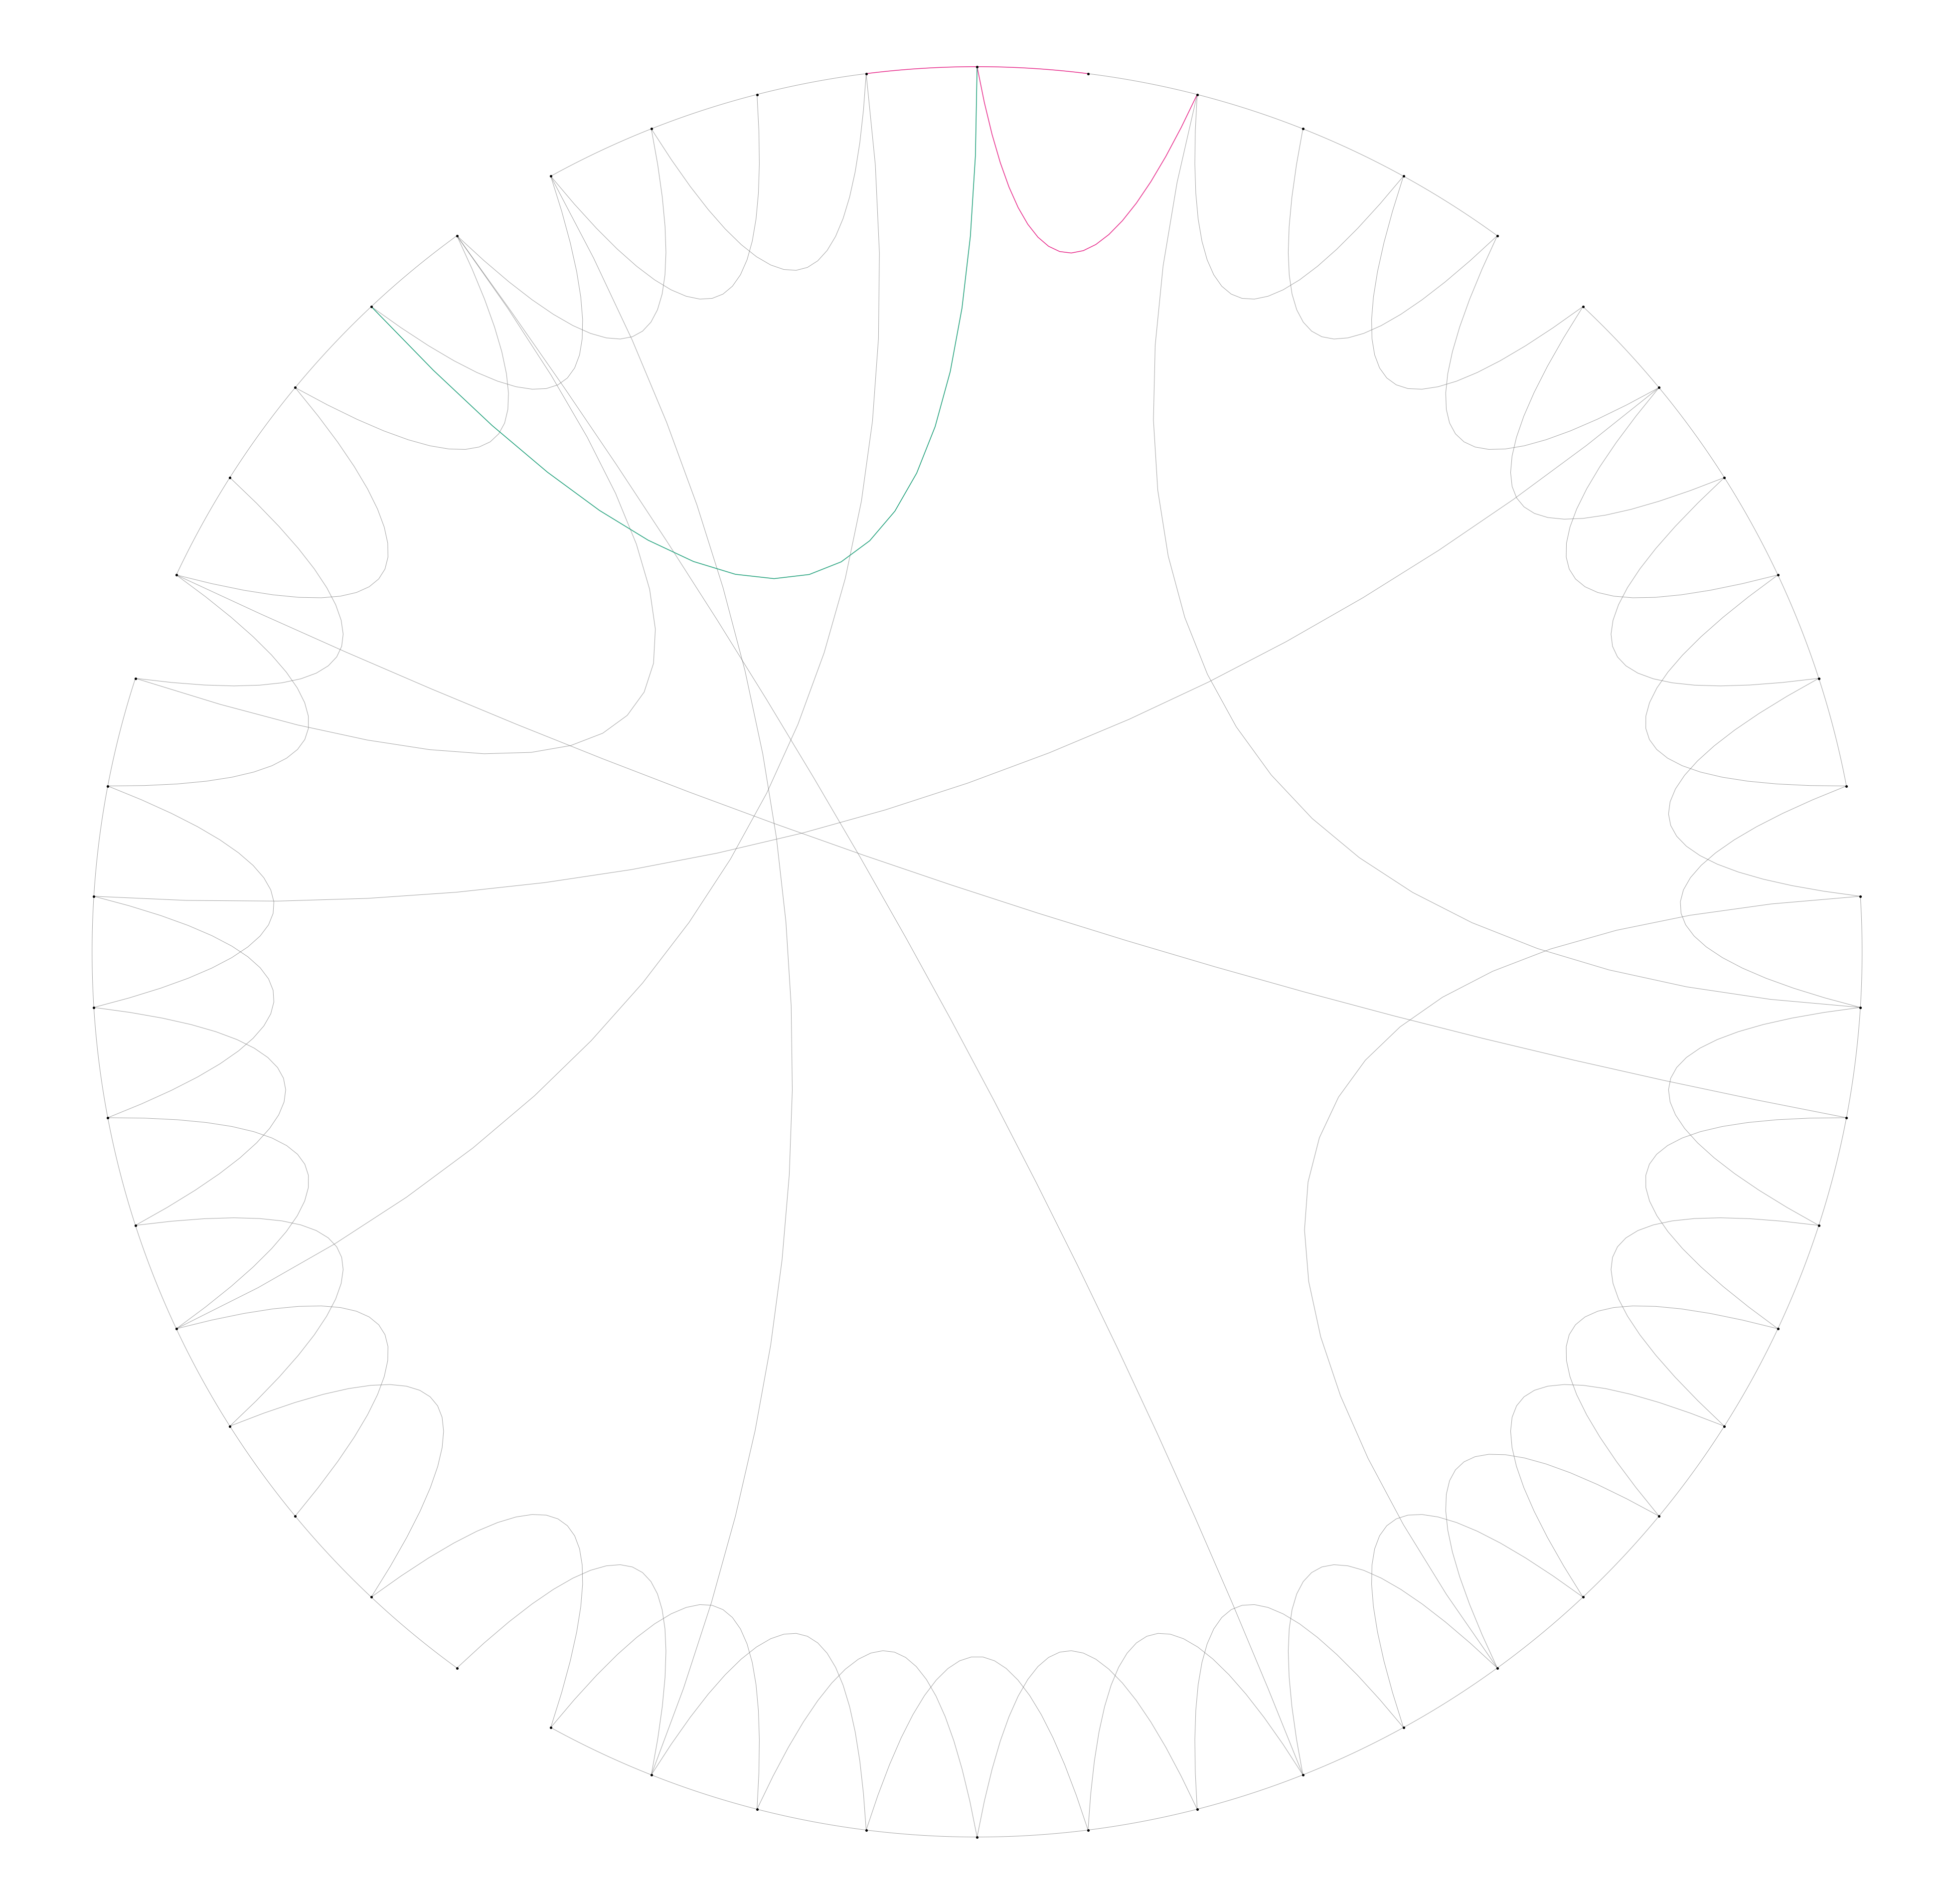

In [45]:
"""
Methods to draw those networks.
"""

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

#def plot_edge(ax,N,u,v,phis,color=None):
colors = [  
            '#666666',
            '#1b9e77',
            '#e7298a'
            ]

mpl.rcParams['font.size'] = 9
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['axes.titlesize'] = 'medium'
#mpl.rcParams['xtick.labelsize'] = 'small'
#mpl.rcParams['ytick.labelsize'] = 'small'
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'medium'
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 1.0


def bezier_curve(P0,P1,P2,n=20):

    t = np.linspace(0,1,20)
    B = np.zeros((n,2))
    for part in range(n):
        t_ = t[part]

        B[part,:] = (1-t_)**2 * P0 + 2*(1-t_)*t_*P1+t_**2*P2

    return B

def is_shortrange(i,j,N,k_over_2):
    distance = np.abs(i-j)

    return distance <= k_over_2 or N-distance <= k_over_2

def draw_network(G, k_over_2, R=10,focal_node=None, ax=None):
    """
    Draw a small world network.
    Parameters
    ==========
    G : network.Graph
        The network to be drawn
    R : float, default : 10.0
        Radius of the circle
    focal_node : int, default : None
        If this is given, highlight edges
        connected to this node.
    ax : matplotlib.Axes, default : None
        Axes to draw on. If `None`, will generate
        a new one.
    Returns
    =======
    ax : matplotlib.Axes
    """

    G_ = G.copy()


    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(70,70))

    focal_alpha = 1

    if focal_node is None:
        non_focal_alpha = 1
        focal_lw = 1.0
        non_focal_lw = 1.0
    else:
        non_focal_alpha = 0.6
        focal_lw = 1.5
        non_focal_lw = 1.0


    N = G_.number_of_nodes()

    phis = 2*np.pi*np.arange(N)/N + np.pi/2

    x = R * np.cos(phis)
    y = R * np.sin(phis)

    points = np.zeros((N,2))
    points[:,0] = x
    points[:,1] = y
    origin = np.zeros((2,))

    col = colors


    ax.axis('equal')
    ax.axis('off')

    if focal_node is None:
        edges = list(G_.edges(data=False))
    else:
        focal_edges = [ e for e in G_.edges(data=False) if focal_node in e]
        G_.remove_edges_from(focal_edges)
        edges = list(G_.edges) + focal_edges

    for i, j in edges:

        phi0 = phis[i]
        phi1 = phis[j]
        dphi = phi1 - phi0

        if dphi > np.pi:
            dphi = 2*np.pi - dphi
            phi0, phi1 = phi1, phi0
            phi1 += 2*np.pi

        distance = np.abs(i-j)

        if i == focal_node or j == focal_node:
            if distance <= k_over_2 or N-distance <= k_over_2:
                this_color = col[2]
            else:
                this_color = col[1]
            this_alpha = focal_alpha
            this_lw = focal_lw
        else:
            this_color = col[0]
            this_alpha = non_focal_alpha
            this_lw = non_focal_lw

        if distance == 1 or N-distance == 1:

            these_phis = np.linspace(phi0, phi1,20)
            these_x = R * np.cos(these_phis)
            these_y = R * np.sin(these_phis)

        else:
            if is_shortrange(i,j,N,k_over_2):
                ophi = phi0 + dphi/2
                o = np.array([
                            0.6*R*np.cos(ophi),
                            0.6*R*np.sin(ophi),
                    ])
            else:
                o = origin
            B = bezier_curve(points[i],o,points[j],n=20)
            these_x = B[:,0]
            these_y = B[:,1]


        ax.plot(these_x, these_y,c=this_color,alpha=this_alpha,lw=this_lw)

    ax.plot(x,y,'o',c='k')

    return ax

if __name__ == "__main__":
    from smallworld import get_smallworld_graph

    N = 50
    k_over_2 = 2
    beta = 0.01

    focal_node = 0

    G = get_smallworld_graph(N, k_over_2, beta)
    draw_network(G,k_over_2,focal_node=0)

    plt.show()

#source:https://github.com/benmaier/smallworld/tree/master/smallworld

In [46]:
binomialTimeStart = time.process_time()
g = nx.Graph()
g.add_nodes_from(range(10))
for i in range(0,10):
    source = random.randint(0,10)
    destination = random.randint(0,10)
    while destination == source:
        destination = random.randint(0,10)
    g.add_edge(source,destination,length = random.randint(0,10))
nx.shortest_path(g,0,9)
binomialTimeEnd = time.process_time()
binomialDuration = binomialTimeEnd - binomialTimeStart
inplementations_time.append(binomialDuration)

### 4. Which implementation of Dijkstra's Algorithm is the fastest?

In [47]:
inplementations_time

[0.0, 0.0, 0.0, 0.0]

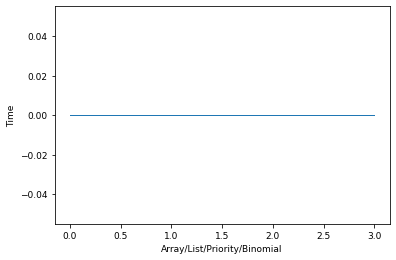

In [48]:
plt.xlabel("Array/List/Priority/Binomial")
plt.ylabel("Time")
plt.plot(inplementations_time)

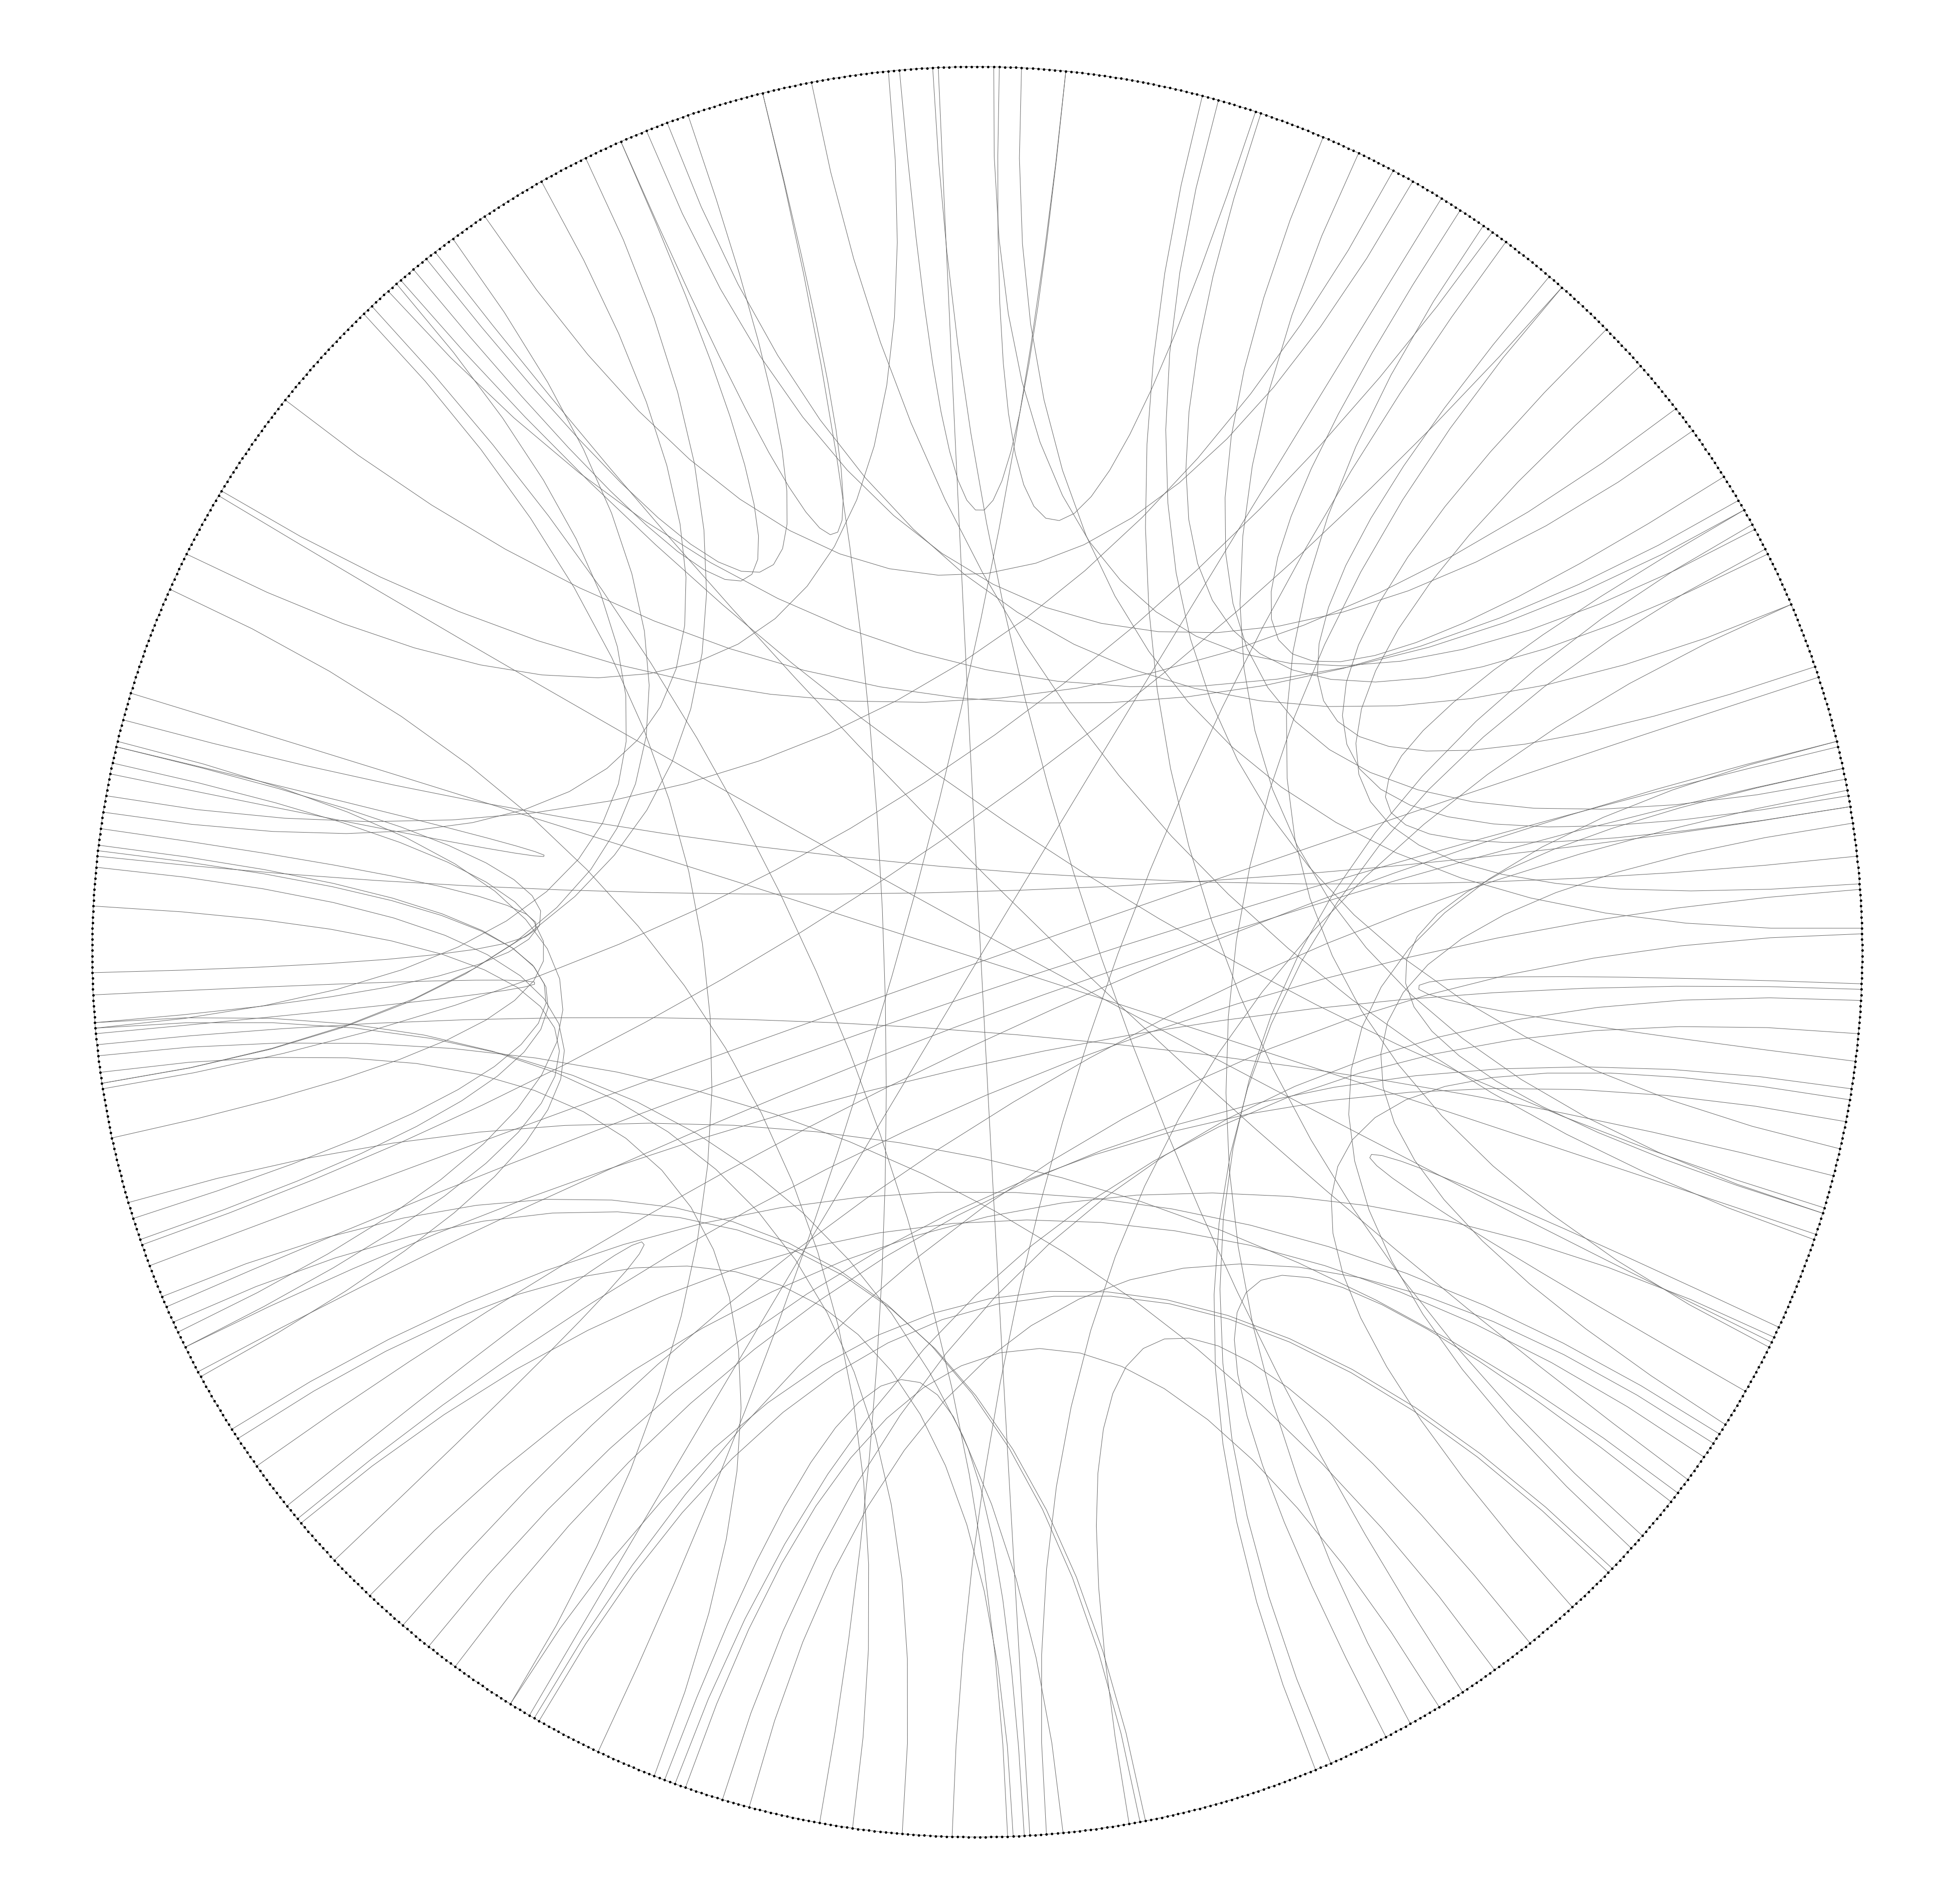

In [50]:
smallWorld = nx.Graph()
smallWorld.add_nodes_from(range(1000))
for i in range(0,1000):
    smallWorld.add_edge(i,i+1,length = 1)
smallWorld.add_edge(1000,0,length = 1)
    
for i in range(0,100):
    source = random.randint(0,1000)
    destination = random.randint(0,1000)
    while destination == source:
        destination = random.randint(0,1000)
    smallWorld.add_edge(source,destination,length = 10)
draw_network(smallWorld,0)

In [26]:
#node_Num = 1000
#origin_Length = 1

#x
#add_edge_Num = 100

#y
#add_edge_Length = random.randint(1,10)

In [ ]:
def addEdge(G,add_edge_Length):    
    for i in range(0,add_edge_Num):
        source = random.randint(0,1000)
        destination = random.randint(0,1000)
        while destination == source:
            destination = random.randint(0,1000)
        G.add_edge(source,destination,length = add_edge_Length)

In [ ]:
#z
def samplePair(G,sample_Num):
    sample_Timelist = []
    for i in range(0,sample_Num):
        sampleTime = nx.shortest_path_length(G,random.randint(0,node_Num),random.randint(0,node_Num),weight='length')
        sample_Timelist.append(sampleTime)
    avgTime = sum(sample_Timelist)/sample_Num
    return avgTime

In [5]:
def newSmallWorld(num, add_edge_Num, add_edge_Length,sample_Num):
    globals()["smallWorld_{}".format(num)] = nx.Graph()
    globals()["smallWorld_{}".format(num)].add_nodes_from(range(1000))
    for i in range(0,1000):
        globals()["smallWorld_{}".format(num)].add_edge(i,i+1,length = 1)
    globals()["smallWorld_{}".format(num)].add_edge(1000,0,length = 1)
    
    #add edge
    for i in range(0,add_edge_Num):
        source = random.randint(0,1000)
        destination = random.randint(0,1000)
        while destination == source:
            destination = random.randint(0,1000)
        globals()["smallWorld_{}".format(num)].add_edge(source,destination,length = add_edge_Length)
    
    #sample
    sample_Timelist = []
    for i in range(0,sample_Num):
        sampleTime = nx.shortest_path_length(globals()["smallWorld_{}".format(num)],random.randint(0,1000),random.randint(0,1000),weight='length')
        sample_Timelist.append(sampleTime)
    avgTime = sum(sample_Timelist)/sample_Num
    return avgTime

### 1. What is the relationship between x and d?

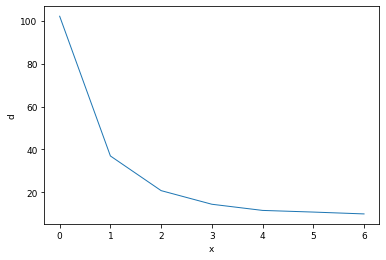

In [49]:
#z = 100
x = []
worldTime = []
for i in range(1,8):
    returnTime = newSmallWorld(i,10**i,10,100)
    x1.append(10**i)
    worldTime.append(returnTime)
plt.xlabel("x")
plt.ylabel("d")
plt.plot(worldTime)

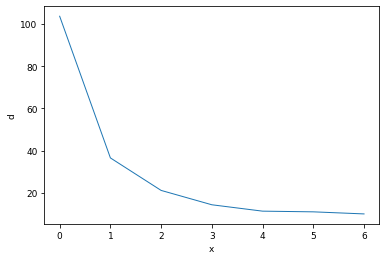

In [50]:
#z=200
x = []
worldTime = []
for i in range(1,8):
    returnTime = newSmallWorld(i,10**i,10,200)
    x.append(10**i)
    worldTime.append(returnTime)
plt.xlabel("x")
plt.ylabel("d")
plt.plot(worldTime)

### 2.What is the relationship between y and d? 

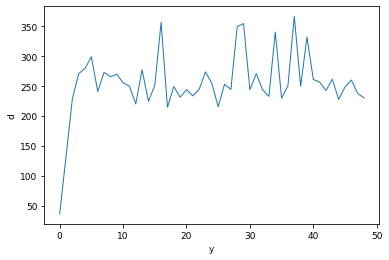

In [53]:
#z=100
y = []
worldTime = []
for i in range(1,50):
    returnTime = newSmallWorld(i,100,10**i,100)
    y.append(10**i)
    worldTime.append(returnTime)
plt.xlabel("y")
plt.ylabel("d")
plt.plot(worldTime)

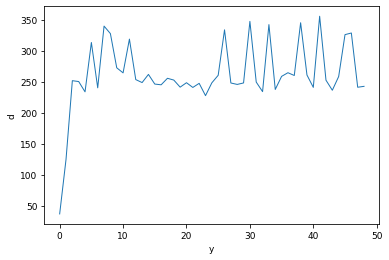

In [56]:
#z=200
y = []
worldTime = []
for i in range(1,50):
    returnTime = newSmallWorld(i,100,10**i,200)
    y.append(10**i)
    worldTime.append(returnTime)
plt.xlabel("y")
plt.ylabel("d")
plt.plot(worldTime)

### 3. How to choose z properly to reflect the true average distance between all pairs of source and destination?

In [102]:
node_Num = 1000
origin_Length = 1

add_edge_Num = 100

add_edge_Length = random.randint(1,10)

sample_Num = 100

In [103]:
smallWorld_3 = nx.Graph()
smallWorld_3.add_nodes_from(range(node_Num))
for i in range(0,1000):
    smallWorld_3.add_edge(i,i+1,length = 1)
smallWorld_3.add_edge(1000,0,length = origin_Length)
    
#add edge
for i in range(0,add_edge_Num):
    source = random.randint(0,1000)
    destination = random.randint(0,1000)
    while destination == source:
        destination = random.randint(0,1000)
    smallWorld_3.add_edge(source,destination,length = add_edge_Length)
    


In [104]:
#sample
avg_LengthList = []
sample_Lengthlist = []
for i in range(1,5):    
    for j in range(0,10**i):
        sampleLength = nx.shortest_path_length(smallWorld_3,random.randint(0,1000),random.randint(0,1000),weight='length')
        sample_Lengthlist.append(sampleLength)
    avgLength = sum(sample_Lengthlist)/10**i
    avg_LengthList.append(avgLength)

In [105]:
avg_LengthList

[28.5, 26.86, 25.736, 25.89]

In [106]:
avg_ans = nx.average_shortest_path_length(smallWorld_3,weight='length')
avg_ans

23.414767232767232

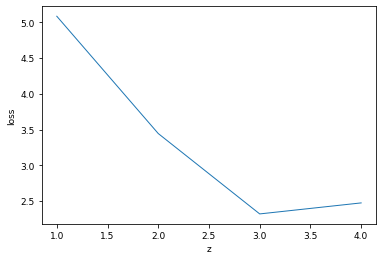

In [114]:
loss = []
for i in range(0,len(avg_LengthList)):
    loss.append(avg_LengthList[i]-avg_ans)
x = [1,2,3,4]
drawLoss = [loss[0],loss[1],loss[2],loss[3]]
plt.xlabel("z")
plt.ylabel("loss")
plt.plot(x,drawLoss)